<a href="https://colab.research.google.com/github/djeannie29/cafe_dados_codigo/blob/main/classificacao/SVR_COMENTADO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   
5    14.20        1.76  2.45               15.2      112.0           3.27   
6    14.39        1.87  2.45               14.6       96.0           2.50   
7    14.06        2.15  2.61               17.6      121.0           2.60   
8    14.83        1.64  2.17               14.0       97.0           2.80   
9    13.86        1.35  2.27               16.0       98.0           2.98   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.

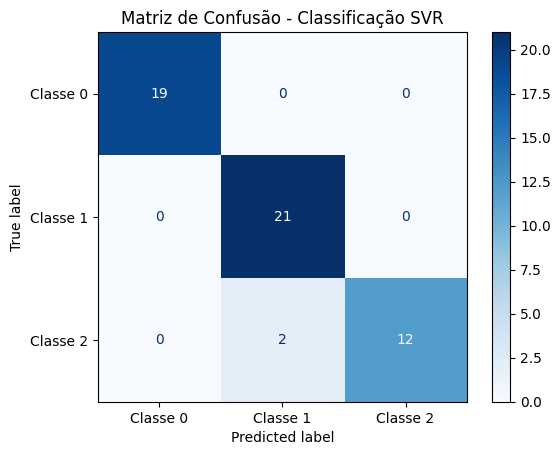

In [5]:
# Importação de bibliotecas essenciais
import numpy as np                    # Biblioteca para operações numéricas
import pandas as pd                  # Biblioteca para manipulação de dados em DataFrames
import matplotlib.pyplot as plt      # Biblioteca para visualização de gráficos

# Importações do scikit-learn
from sklearn.datasets import load_wine                       # Dataset de vinhos embutido no sklearn
from sklearn.model_selection import train_test_split         # Para dividir os dados em treino e teste
from sklearn.svm import SVR                                  # Regressor baseado em Máquinas de Vetores de Suporte (SVR)
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  # Métricas de regressão (não utilizadas aqui)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay           # Matriz de confusão e visualização
from sklearn.preprocessing import StandardScaler             # Para padronizar os dados

# Carrega o dataset Wine como um DataFrame do Pandas
data = load_wine(as_frame=True)
df = data.frame

# Exibe as 10 primeiras linhas do dataset
print(df.head(10))

# Define as variáveis independentes (X) e a variável alvo (y)
X = df.drop(columns=["target"])  # Remove a coluna alvo, ficando apenas com as características químicas
y = df["target"]                 # Coluna alvo: classe do vinho (0, 1 ou 2)

# Divide os dados em treino (70%) e teste (30%), de forma aleatória porém reprodutível (random_state=42)
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.3, random_state=42)

# Padroniza os dados (transforma para média 0 e desvio padrão 1)
scaler = StandardScaler()
X_tr_scaled = scaler.fit_transform(X_tr)  # Ajusta nos dados de treino e transforma
X_te_scaled = scaler.transform(X_te)      # Transforma os dados de teste com base no treino

# Cria e treina o modelo SVR (regressão com kernel RBF)
model = SVR(kernel='rbf', C=100, gamma='scale', epsilon=0.1)
model.fit(X_tr_scaled, y_tr)  # Treina o modelo nos dados escalonados

# Faz previsões no conjunto de teste
pred = model.predict(X_te_scaled)

# Como SVR é um modelo de regressão, suas saídas são valores contínuos.
# Para tratar como classificação, arredondamos os valores para inteiros (classes 0, 1, 2)
pred_class = np.round(pred).astype(int)

# Gera matriz de confusão para avaliar o desempenho da "classificação"
cm = confusion_matrix(y_te, pred_class)

# Determina os rótulos presentes nas classes reais e previstas (para não deixar nenhuma classe de fora)
labels = sorted(np.unique(np.concatenate((y_te, pred_class))))

# Cria a visualização da matriz de confusão com rótulos personalizados
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[f"Classe {i}" for i in labels])
disp.plot(cmap="Blues", values_format="d")  # Mapa de calor em azul com valores inteiros
plt.title("Matriz de Confusão - Classificação SVR")  # Título do gráfico
plt.show()  # Exibe o gráfico
